<h1>Un modelo de control óptimo para una campaña de vacunación con una provisión escasa de vacunas y distribuída en el tiempo </h1>


<h2> El modelo </h2>

Tal como está en el paper
$$
\left\{\begin{array}{l}\frac{d S_{i}}{d t}=\mu N_{i}-S_{i}(t) \sum_{j=1}^{n} \beta_{i j} I_{j}(t)-\delta \sigma_{i} S_{i}(t)-d S_{i}(t) \\ 
\frac{d I_{i}}{d t}=S_{i}(t) \sum_{j=1}^{n} \beta_{i j} I_{j}(t)-(d+\alpha+\gamma) I_{i}(t) \\ 
\frac{d R_{i}}{d t}=\gamma I_{i}(t)+\delta \sigma_{i} S_{i}(t)-d R_{i}(t)\\
\end{array}\right. 
$$

Vamos a simplificarlo a fin de  entenderlo mejor. Supongamos  dos nodos $n=2$, una efectividad de la vacuna $\delta=1$, que no hay  cambios demográficos $\mu=d=0$ y, como es costumbre,  no distinguimos entre muertos por la enfermedad y sobrevivientes inmunizados, consecuentemente, en el modelo podemos suponer $\alpha=0$. Se ve que la población en los nodos es constante $N_i$, $i=1,2$, con lo cual $R_i=N_i-S_i-I_i$. Podemos así considerar el sistema para las variables $S_i,I_i$. 


$$
\left\{
\begin{split}
S_1'(t)&= - S_{1} \sigma_{1} - S_{1} \left(I_{1} \beta_{11} + I_{2} \beta_{12}\right), \\
S_2'(t)&=  - S_{2} \sigma_{2} - S_{2} \left(I_{1} \beta_{21} + I_{2} \beta_{22}\right), \\  
I_1'(t)&=\  - I_{1} \gamma + S_{1} \left(I_{1} \beta_{11} + I_{2} \beta_{12}\right), \\  
I_2'(t)&=- I_{2} \gamma + S_{2} \left(I_{1} \beta_{21} + I_{2} \beta_{22}\right), \\  
\end{split}
\right.\tag{1}
$$

El control $\sigma=(\sigma_1,\sigma_2)$ satisface la restricción
$$
\sigma(t)\in A(t):=\{(\sigma_1,\sigma_2)\mid\quad \sigma_1,\sigma_2\geq 0,\quad \sigma_1+\sigma_2=\sigma_T(t)\}
$$

La función objetivo es
$$
J(\sigma)=-\gamma\int_0^T(I_1(t)+I_2(t))dt.
$$

<h2> Introduciendo el modelo en SymPy </h2>

Vamos a usar SymPy para hacer cuentas. A continuación introducimos todas las variables, parámetros y las variables del problema adjunto $\lambda_i$  dentro del espacio de trabajo de python

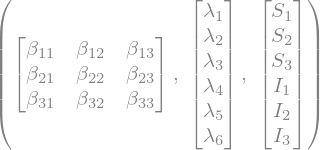

In [1]:
from sympy import *
init_printing()
t=symbols('t', real=True)
S=Matrix(symbols('S1:4',positive =True))
I=Matrix(symbols('I1:4',positive =True))
x=Matrix([S[0],S[1],S[2],I[0],I[1],I[2]])
sigma=symbols('sigma1:4',positive =True)
lam=symbols('lambda1:7',real =True)
beta=symbols('beta(1:4)(1:4)')
beta=Matrix(beta).reshape(3,3)
gamma=symbols('gamma', positive=True)
lam=Matrix(lam)
sigma=Matrix(sigma)
beta, lam, x

**Introducimos el campo vectorial que llamamos $f$ y la función costo $r=-\gamma(I_1+I_2)$**

Voy a invocar los resultados del libro de control de Evans  con las siguientes notaciones 

\begin{array}{cl}
  Evans  &  Aquí\\
  r    & -\gamma(I_1+I_2) \text{ esto por  que en Evans se maximiza la funcional}\\
  f    & \text{Campo vectorialde la ODE (1)}\in\mathbb{R}^4\\
  g    &  \equiv 0\\
  p    &  \lambda \in \mathbb{R}^4 \text{variable adjunta }\\
  x    &  \text{variable estado conjunta: } (S_1,S_2,I_1,I_2)  \\
  a    &  \text{Control } \sigma \\
\end{array}


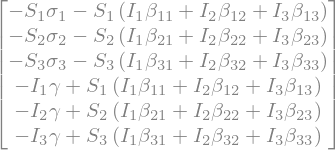

In [2]:
from sympy.matrices import matrix_multiply_elementwise as mul
Incidencia=mul(beta*I,S)
dS=-mul(S,sigma)-Incidencia
dI=Incidencia-gamma*I
f=Matrix([dS,dI])
f

<h2> Hamiltoniano </h2>  
$$H(x,\lambda,\sigma)=f(x,\sigma)\cdot \lambda+r(x)$$

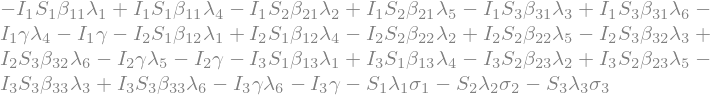

In [3]:
r=-gamma*sum(I)
H=f.dot(lam)+r
H.expand().collect(sigma)

<h3>
<span style="color:blue"> OBSERVACIÓN: $H$ es lineal en $\sigma$</span>.
    </h3>

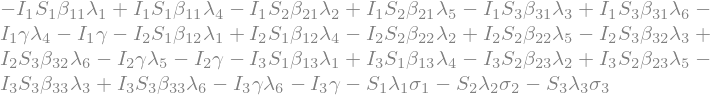

In [4]:
H.expand().collect(sigma)

<h2> Ecuación adjunta </h2>
(ADJ) en Evans
$$\lambda'(t)=-\frac{\partial H}{\partial x}$$
Computo $\frac{\partial H}{\partial x}$

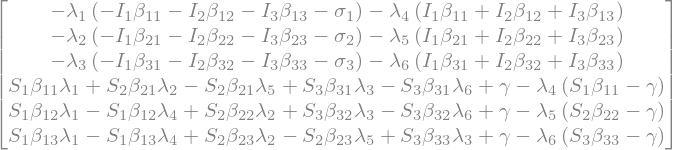

In [5]:
dx=H.diff(lam)
dlambda=-H.diff(x)
dlambda.factor()

<h3>
<span style="color:blue"> Me parece que la segunda y cuarta componente  es distinta que el paper que venimos escribiendo. Revisemos</span>.
</h3>

Introducimos la función $\sigma_T(t)$. 

In [6]:
sigma_T=Function('sigma_T')(t)

<h2> Ecuación (M) de Evans</h2>
Los controles tienen que satisfacer la restricción
$$
\sigma(t)\in A(t):=\{(\sigma_1,\sigma_2)\mid\quad \sigma_1,\sigma_2\geq 0,\quad \sigma_1+\sigma_2=\sigma_T(t)\}
$$

Ahora consideramos la ecuación (M) de Evans pag. 48
$$
H\left(\mathbf{x}^{*}(t), \mathbf{\lambda}^{*}(t), \boldsymbol{\sigma}^{*}(t)\right)=\max _{a \in A(t)} H\left(\mathbf{x}^{*}(t), \mathbf{\lambda}^{*}(t), \sigma\right) \quad\left(0 \leq t \leq T\right) \tag{M}.
$$
<span style="color:blue"> OBSERVACIÓN: en Evans el conjunto $A$ no depende de $t$. Creo que en la siguiente bibliografía (es un enlace hacer click y va a la descarga) esta considerado el caso $A$ dependientede  $t$ </span>.

* [	Nonlinear Optimal Control Theory, L. Berkovitz, N. Medhin ](http://libgen.rs/book/index.php?md5=EF38F74884419EE1FFFD1EA975628230)

Me parece que el hecho de que $A$ dependa de $t$ no cambia mucho el planteo. Lo que si me parece que hay que prestar atención es a resolver correctamente el problema de maximización (M).
<span style="color:blue"> 
(M) es un problema de hallar en cada momento $t$ un máximo de una función $H$ sobre la variable $\sigma=(\sigma_1,\sigma_2)$  con las 3 restricciones $\sigma_1,\sigma_2\geq 0$ $\sigma_1+\sigma_2=\sigma_T(t)$. Es un problema de maximización de una función lineal sobre un simplex de $\mathbb{R}^2$..</span> <span style="color:red">  En general (nodos arbitrarios) creo que será un problema de maximización de una función lineal de $n$-variables sobre un simplex de $\mathbb{R}^n$ Es un problema de programación Lineal </span>.

El caso particular que tenemos es más facil, sustituímos $\sigma_2$ por $\sigma_T(t)-\sigma_1$ y resolvemos el problema de máximo para $\sigma_1\in [0,\sigma_T(t)]$. 

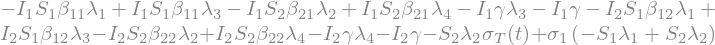

In [7]:
H2=H.subs(sigma[1],sigma_T-sigma[0]).expand().collect(sigma[0])
H2

Una función lineal sobre un intervalo alcanza su máximo sobre un extremos, cual de ellos depende de la pendiente 
$$
-S_{1} \lambda_{1} + S_{2} \lambda_{2}
$$
tendremos los casos

$$
\sigma_1(t) 
\left\{
\begin{array}{ll}
&=\sigma_T(t) &\text{  si}\quad S_{1} \lambda_{1} < S_{2} \lambda_{2}\\
&\in [0,\sigma_T(t)] &\text{  si}\quad S_{1} \lambda_{1} = S_{2} \lambda_{2}\\
&=0 &\text{  si}\quad S_{1} \lambda_{1} > S_{2} \lambda_{2}\\
\end{array}
\right.
$$

<span style="color:red"> **1ra CONCLUSIÓN**: Parece ser que toda la dosis de vacunas se aplica en un nodo y nada al otro. Excepto cuando  
    $$ t\in B(t):=\left\{t\in[0,\sigma_T(t)]\mid  S_{1} \lambda_{1} = S_{2} \lambda_{2}\right\}.$$ 
Si pudieramos encontar el conjunto $B(t)$ (no parece facil pues depende de las ecuaciones y del control) encontraríamos la estrategia óptima de vacunación.  
 </span> 
 
 
 Además de las ecuaciones anteriores se tiene que satisfacer según don Evans que la función

$$
    t \mapsto H\left(x^{*}(t), \lambda^{*}(t), \sigma^{*}(t)\right),\tag{C}
 $$
es **constante** y que se da la **condición terminal**

$$
\lambda^{*}(T)=\nabla g\left(x^{*}(T)\right)=0.
$$